# How to simplify your dataset easily

We will explore dimensionality reduction techniques. We'll build PCA from scratch, and compare it to TSNE and LDA.

Our purpose is to reduce the dimensionality of our data so it is easier to visualise

Reasons why:

1. Data is huge! We want to be efficient with space
2. Computing efficiency - We can learn faster with less dimensions
3. Human readable - By reducing our dimensions, we can understand our data better

In [2]:
import numpy as np
np.random.seed(1)

In [5]:
mu_vec1 = np.array([0,0,0]) # Sample values
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # Sample covariance

# We'll use the mean and covariance to generate our first dataset...

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

# We generated a multivariate normal distribution (gaussian distribution). 
# It's a 3 dimensional matrix of values (3 columns, with 20 rows each).
# It's a distribution of possibilities

print class1_sample

[[-0.75439794 -0.29809284  1.13162939 -1.39649634  0.16003707 -2.02220122
   0.23009474 -0.20075807  0.19829972  0.37756379  1.19891788 -0.63873041
  -0.34385368  0.69803203  0.40349164  0.16938243 -0.26621851  0.31515939
   0.35054598 -1.61577235]
 [ 1.25286816  0.48851815  1.51981682 -1.44411381  0.87616892 -0.30620401
   0.76201118  0.18656139  0.11900865  0.12182127  0.18515642  0.42349435
   0.04359686 -0.44712856  0.59357852  0.74055645  0.03261455  0.84616065
  -1.31228341  1.12141771]
 [ 0.51292982 -0.07557171  2.18557541 -0.50446586  0.31563495  0.82797464
  -0.22232814  0.41005165 -0.67066229  1.12948391 -0.37528495  0.07734007
  -0.62000084  1.2245077  -1.09491185 -0.9537006  -1.37311732 -0.85951594
  -0.03869551  0.40890054]]


In [6]:
mu_vec2 = np.array([1,1,1]) # Sample values
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # Sample covariance

# We'll use the mean and covariance to generate our first dataset...

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print class2_sample

[[  9.75383044e-01   2.96710175e+00   2.62765075e+00   1.86334532e+00
   -2.30058136e-01   3.76469270e-01   1.80186103e+00   8.98254127e-01
    1.52946532e+00   1.61838026e+00   6.89883226e-01   3.18697965e+00
    8.63555256e-01  -1.22018729e-01   1.24879916e+00   8.25296840e-01
    3.19069973e+00   1.90148689e+00   1.04366899e+00   7.12692137e-01]
 [  2.24838381e-01  -8.57981864e-01   1.33801170e+00   8.19079698e-01
    1.55053750e+00   1.52057634e+00   1.04656730e+00   1.86888616e+00
    1.13770121e+00   1.23249456e+00  -1.43483776e+00   1.44136444e+00
    8.80945812e-01   4.82905542e-01   7.03358848e-01   1.98633519e+00
   -8.96360923e-01   3.52832571e+00   7.73685757e-01   1.68006984e+00]
 [  2.27375593e+00   2.23616403e+00  -1.99268032e-01   3.96079372e-01
    1.79280687e+00  -1.44341390e-01   8.13430228e-01   1.75041164e+00
    1.07782113e+00   1.68255141e+00   2.03882460e+00   8.99844767e-01
    1.01740941e+00   2.97317235e-03   1.49521132e+00   1.21353390e+00
    3.53083312e-01

In [13]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,8))

# These are sublot grid parameters encoded as a single integer
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

# Plot samples
ax.plot(class1_sample[0,:], class1_sample[1, :], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1, :], class2_sample[2,:], 'o', markersize=8, color='green', alpha=0.5, label='class2')
ax.legend(loc='upper right')
plt.show()

ImportError: No module named mpl_toolkits.mplot3d

In [22]:
# Merge data into big ass dataset
all_samples = np.concatenate([class1_sample, class2_sample], axis=1)
all_samples.T

array([[ -7.54397941e-01,   1.25286816e+00,   5.12929820e-01],
       [ -2.98092835e-01,   4.88518147e-01,  -7.55717130e-02],
       [  1.13162939e+00,   1.51981682e+00,   2.18557541e+00],
       [ -1.39649634e+00,  -1.44411381e+00,  -5.04465863e-01],
       [  1.60037069e-01,   8.76168921e-01,   3.15634947e-01],
       [ -2.02220122e+00,  -3.06204013e-01,   8.27974643e-01],
       [  2.30094735e-01,   7.62011180e-01,  -2.22328143e-01],
       [ -2.00758069e-01,   1.86561391e-01,   4.10051647e-01],
       [  1.98299720e-01,   1.19008646e-01,  -6.70662286e-01],
       [  3.77563786e-01,   1.21821271e-01,   1.12948391e+00],
       [  1.19891788e+00,   1.85156417e-01,  -3.75284950e-01],
       [ -6.38730407e-01,   4.23494354e-01,   7.73400683e-02],
       [ -3.43853676e-01,   4.35968568e-02,  -6.20000844e-01],
       [  6.98032034e-01,  -4.47128565e-01,   1.22450770e+00],
       [  4.03491642e-01,   5.93578523e-01,  -1.09491185e+00],
       [  1.69382433e-01,   7.40556451e-01,  -9.5370060

In [23]:
# step 4 - compute the dimensional mean vector. It will help compute the covariance matrix
# We'll find the mean for each feature

mean_x = np.mean(all_samples[0,:]) 
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

# 3d mean vector
mean_vector = np.array(([[mean_x], [mean_y], [mean_z]]))
print mean_vector

[[ 0.64163822]
 [ 0.62075309]
 [ 0.5691864 ]]


In [25]:
# Step 5 - compute the covariance matrix
# This shows the relationships between all the different features

cov_mat = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    cov_mat += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
    
print cov_mat    

[[ 55.72268233   8.56379035  15.6311867 ]
 [  8.56379035  38.93427549   4.92664064]
 [ 15.6311867    4.92664064  39.61912037]]


In [27]:
# Step 6 - compute the eigenvectors and eigen values

# We want to work out the principle component of the data, the line that we can recreate everything from 
# given some distribution and a line, we can recreate our dataset.
# The line and the eigenvector (where that line should be) represent the essence of our data

eig_val, eig_vec = np.linalg.eig(cov_mat)

print "Values" # Magnitude of our direction
print eig_val
print "Vectors" # Direction
print eig_vec

Values
[ 68.54813467  30.0773638   35.65057972]
Vectors
[[-0.81100975 -0.53005318  0.24760212]
 [-0.31639546  0.04139469 -0.94772379]
 [-0.4920946   0.84695343  0.20127792]]


In [29]:
# Eigenvalues and eigenvectors are linked
# We'll create eigenpairs and sort them

eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,1])
            for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Print out the list
for i in eig_pairs:
    print(i[0])

68.5481346667
35.6505797213
30.0773637982


In [35]:
# Step 8 - choose k eigvectors

matrix_w= np.hstack((eig_pairs[0][1].reshape(3,1),
                    eig_pairs[1][1].reshape(3,1)))

print matrix_w

[[-0.53005318 -0.53005318]
 [ 0.04139469  0.04139469]
 [ 0.84695343  0.84695343]]


In [37]:
# Step 9 - transform our data using this eigenpair dataset
transformed = matrix_w.T.dot(all_samples)
print transformed

[[ 0.88616079  0.11422139  1.31416917  0.25317959  0.21876868  1.76045492
  -0.27872081  0.46142975 -0.66820279  0.76153414 -0.94567461  0.42159494
  -0.34104643  0.64859815 -1.11664037 -0.86686658 -1.02050639 -0.85999465
  -0.27290287  1.24918572  1.41806761  0.28568918 -1.5061788  -0.61830578
   1.70455099 -0.25885538 -0.22282232  1.08375665  0.14926113  0.61823381
   1.30172002 -0.86747725  0.44043466  0.08718428  0.63355971  0.67257921
  -1.4293     -0.22546387  1.45346201  0.26787761]
 [ 0.88616079  0.11422139  1.31416917  0.25317959  0.21876868  1.76045492
  -0.27872081  0.46142975 -0.66820279  0.76153414 -0.94567461  0.42159494
  -0.34104643  0.64859815 -1.11664037 -0.86686658 -1.02050639 -0.85999465
  -0.27290287  1.24918572  1.41806761  0.28568918 -1.5061788  -0.61830578
   1.70455099 -0.25885538 -0.22282232  1.08375665  0.14926113  0.61823381
   1.30172002 -0.86747725  0.44043466  0.08718428  0.63355971  0.67257921
  -1.4293     -0.22546387  1.45346201  0.26787761]]


In [38]:
# We just performed principle component analysis! We changed our data from three dimensions to two.

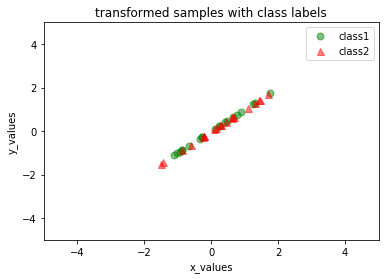

In [42]:
plt.plot(transformed[0, 0:20], transformed[1, 0:20], 'o', markersize=7, color="green", alpha=0.5, label='class1')
plt.plot(transformed[0, 20:40], transformed[1, 20:40], '^', markersize=7, color="red", alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title("transformed samples with class labels")
plt.show()

# Dimensionality Reduction Techniques

## PCA

For the best generic dimensionality reduction method is PCA. Generally used for unsupervised data.

## LDA (Linear discriminant analysis)

Best for supervised data. Same as PCA, but instead of computing mean vector for the whole dataset, we compute them for each of the classes.

## TSNE

The best for visualisation. 